## Statistics 

Statistics is the science of collecting, organizing, presenting, analyzing, and interpreting data to help in making more
effective decisions.

➢ Statistical Analysis is implemented to manipulate, summarize and investigate data, so that useful decision-making information results are obtained.

## Types of Statistics

![alt text](../assets/Types_stats.png "Types of Statistics")

## What comes under Descriptive Stats

![descriptive stats](../assets/descriptive_stats.png "descriptive stats")

## Introduction to Basic Terms

➢ Variable - A characteristic about each individual element of a population/sample.

➢ Data (singular) - A value of the associated variable with one element of a population/sample. This value may be a
number, a word, or a symbol.

➢ Data (plural) - A set of values collected for the variable from each of the elements belonging to the sample.

➢ Experiment - A planned activity whose results yield a set of data.

➢ Population - The entire collection/set of individuals/objects/events of interest whose properties are to be analyzed. There are two kinds:

    • Finite
    • Infinite

➢ Sample – A portion, or part, of the population of interest

➢ Parameter - A numerical value which summarizes the entire population data.

➢ Statistics - A numerical value which summarizes the sample data.

## Kinds of Variables

![](../assets/six_sigma_data_types.jpg)

# Descriptive Statitics

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

# from ggplot import *

import pandas as pd

## Data Description 

source : https://archive.ics.uci.edu/ml/datasets/Wine+Quality

    Relevant Information:

       The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
       For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
       Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
       are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

       These datasets can be viewed as classification or regression tasks.
       The classes are ordered and not balanced (e.g. there are munch more normal wines than
       excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
       or poor wines. Also, we are not sure if all input variables are relevant. So
       it could be interesting to test feature selection methods. 

    Number of Instances: red wine - 1599; white wine - 4898. 

    Number of Attributes: 11 + output attribute

    Note: several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.

    Attribute information:

           For more information, read [Cortez et al., 2009].

           Input variables (based on physicochemical tests):
           1 - fixed acidity
           2 - volatile acidity
           3 - citric acid
           4 - residual sugar
           5 - chlorides
           6 - free sulfur dioxide
           7 - total sulfur dioxide
           8 - density
           9 - pH
           10 - sulphates
           11 - alcohol
           Output variable (based on sensory data): 
           12 - quality (score between 0 and 10)

    Missing Attribute Values: None

In [2]:
red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")

In [3]:
white_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=";")

In [4]:
red_wine["color"] = "R"

In [5]:
white_wine["color"] = "W"

In [6]:
def central_tendency(series):
    pass

In [7]:
print("white mean = ",white_wine["quality"].mean())
print("red mean =",red_wine["quality"].mean())

white mean =  5.87790935075541
red mean = 5.6360225140712945


In [8]:
all_wine = pd.concat([red_wine,white_wine],axis=0,sort=True)

In [15]:
all_wine.rename(lambda f : f.replace(" ","_"),axis=1,inplace=True)
all_wine.columns

Index(['alcohol', 'chlorides', 'citric_acid', 'color', 'density',
       'fixed_acidity', 'free_sulfur_dioxide', 'pH', 'quality',
       'residual_sugar', 'sulphates', 'total_sulfur_dioxide',
       'volatile_acidity'],
      dtype='object')

In [70]:
all_wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [71]:
all_wine.describe().rename_axis('metric').reset_index()

,metric,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
1,mean,10.491801,0.056034,0.318633,0.994697,7.215307,30.525319,3.218501,5.818378,5.443235,0.531268,115.744574,0.339666
2,std,1.192712,0.035034,0.145318,0.002999,1.296434,17.749400,0.160787,0.873255,4.757804,0.148806,56.521855,0.164636
3,min,8.000000,0.009000,0.000000,0.987110,3.800000,1.000000,2.720000,3.000000,0.600000,0.220000,6.000000,0.080000
4,25%,9.500000,0.038000,0.250000,0.992340,6.400000,17.000000,3.110000,5.000000,1.800000,0.430000,77.000000,0.230000
5,50%,10.300000,0.047000,0.310000,0.994890,7.000000,29.000000,3.210000,6.000000,3.000000,0.510000,118.000000,0.290000
6,75%,11.300000,0.065000,0.390000,0.996990,7.700000,41.000000,3.320000,6.000000,8.100000,0.600000,156.000000,0.400000
7,max,14.900000,0.611000,1.660000,1.038980,15.900000,289.000000,4.010000,9.000000,65.800000,2.000000,440.000000,1.580000


## checking stats as per groups 

In [16]:
summary = all_wine.groupby('color').apply(lambda x : x.describe().rename_axis('metric').reset_index()).reset_index(level=0)

summary

,color,metric,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,R,count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
1,R,mean,10.422983,0.087467,0.270976,0.996747,8.319637,15.874922,3.311113,5.636023,2.538806,0.658149,46.467792,0.527821
2,R,std,1.065668,0.047065,0.194801,0.001887,1.741096,10.460157,0.154386,0.807569,1.409928,0.169507,32.895324,0.179060
3,R,min,8.400000,0.012000,0.000000,0.990070,4.600000,1.000000,2.740000,3.000000,0.900000,0.330000,6.000000,0.120000
4,R,25%,9.500000,0.070000,0.090000,0.995600,7.100000,7.000000,3.210000,5.000000,1.900000,0.550000,22.000000,0.390000
5,R,50%,10.200000,0.079000,0.260000,0.996750,7.900000,14.000000,3.310000,6.000000,2.200000,0.620000,38.000000,0.520000
6,R,75%,11.100000,0.090000,0.420000,0.997835,9.200000,21.000000,3.400000,6.000000,2.600000,0.730000,62.000000,0.640000
7,R,max,14.900000,0.611000,1.000000,1.003690,15.900000,72.000000,4.010000,8.000000,15.500000,2.000000,289.000000,1.580000
0,W,count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
1,W,mean,10.514267,0.045772,0.334192,0.994027,6.854788,35.308085,3.188267,5.877909,6.391415,0.489847,138.360657,0.278241


In [25]:
all_wine.groupby('color').apply(lambda x : x.describe().rename_axis('metric').reset_index()).reset_index(0)

,color,metric,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,R,count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
1,R,mean,10.422983,0.087467,0.270976,0.996747,8.319637,15.874922,3.311113,5.636023,2.538806,0.658149,46.467792,0.527821
2,R,std,1.065668,0.047065,0.194801,0.001887,1.741096,10.460157,0.154386,0.807569,1.409928,0.169507,32.895324,0.179060
3,R,min,8.400000,0.012000,0.000000,0.990070,4.600000,1.000000,2.740000,3.000000,0.900000,0.330000,6.000000,0.120000
4,R,25%,9.500000,0.070000,0.090000,0.995600,7.100000,7.000000,3.210000,5.000000,1.900000,0.550000,22.000000,0.390000
5,R,50%,10.200000,0.079000,0.260000,0.996750,7.900000,14.000000,3.310000,6.000000,2.200000,0.620000,38.000000,0.520000
6,R,75%,11.100000,0.090000,0.420000,0.997835,9.200000,21.000000,3.400000,6.000000,2.600000,0.730000,62.000000,0.640000
7,R,max,14.900000,0.611000,1.000000,1.003690,15.900000,72.000000,4.010000,8.000000,15.500000,2.000000,289.000000,1.580000
0,W,count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
1,W,mean,10.514267,0.045772,0.334192,0.994027,6.854788,35.308085,3.188267,5.877909,6.391415,0.489847,138.360657,0.278241


## [Assignment 1] :  Provide a visual summary of the same metric available in summary data frame 

## [Assignment 2 ] : Write the inferential statement after each visual summary

## [Assignment 3 ] : Try to automate the visual summary and inferential summary using a function

## correlation
A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between two variables.

Several types of correlation coefficient exist, each with their own definition and own range of usability and characteristics. They all assume values in the range from −1 to +1, where +1 indicates the strongest possible agreement and −1 the strongest possible disagreement.

It most often refers to how close two variables are to having a linear relationship with each other. Familiar examples of dependent phenomena include the correlation between the physical statures of parents and their offspring, and the correlation between the demand for a limited supply product and its price.


## Check relationship between the predictor variables


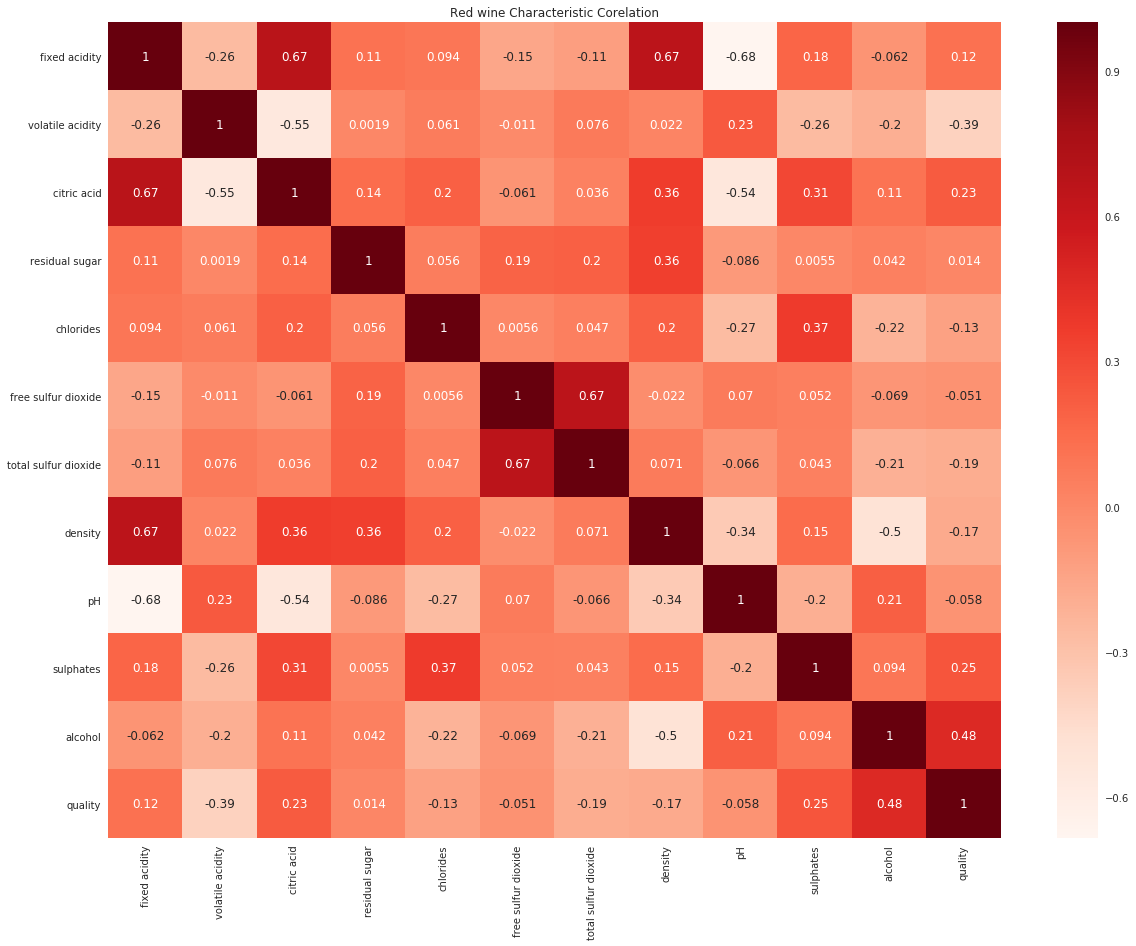

In [89]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Red wine Characteristic Corelation")
red_corr = red_wine.corr()
sns.heatmap(red_corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds",annot=True)
plt.show()

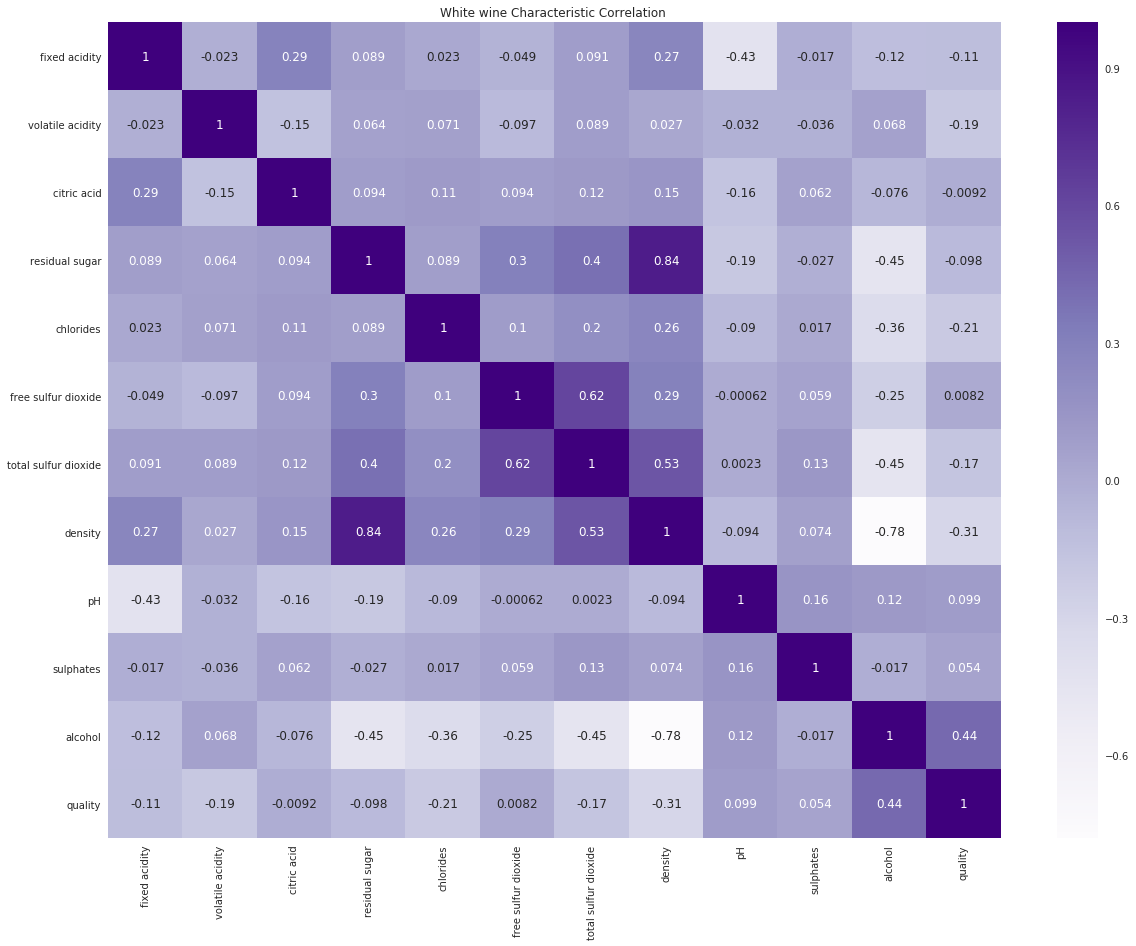

In [90]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("White wine Characteristic Correlation ")
white_corr = white_wine.corr()
sns.heatmap(white_corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Purples",annot=True)

In [91]:
diff_corr = red_corr - white_corr

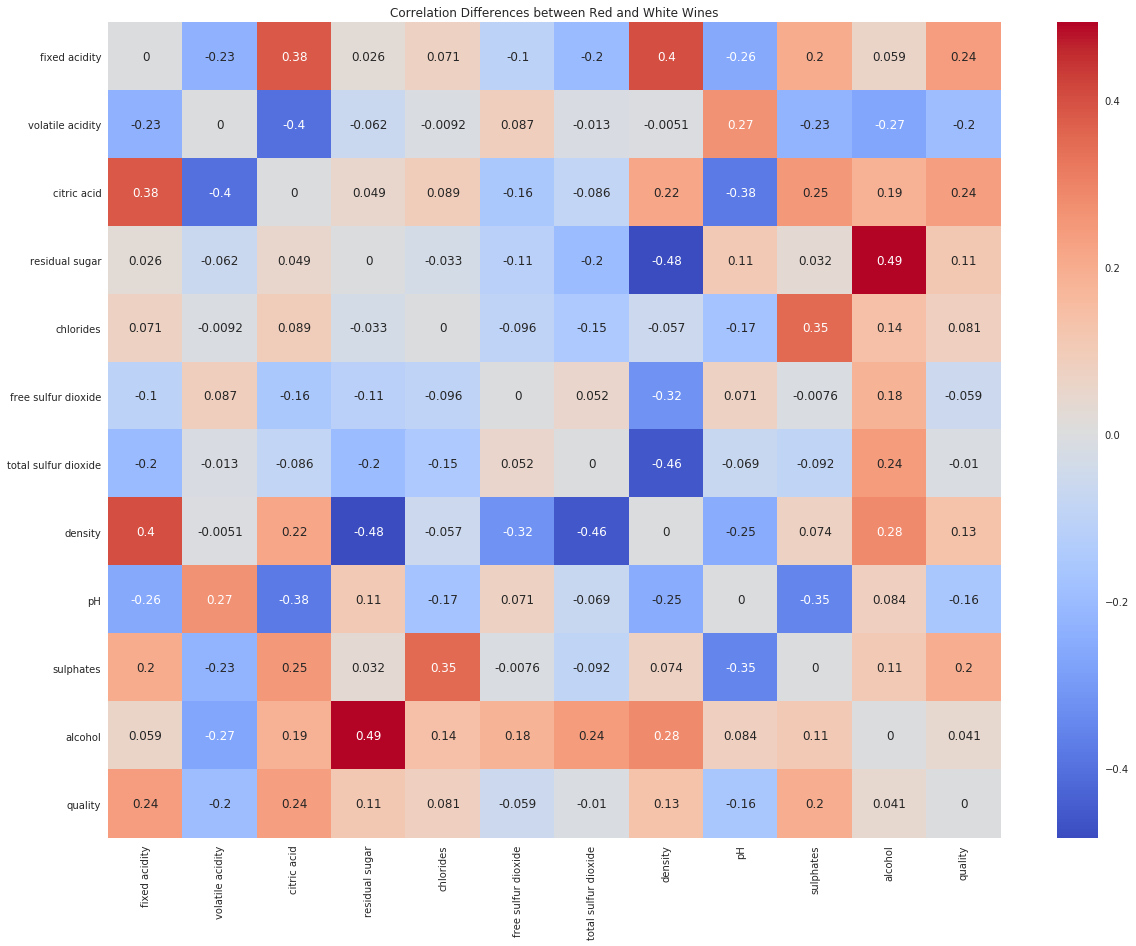

In [92]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Differences between Red and White Wines")
corr = diff_corr
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="coolwarm",annot = True)

There are some noteable differences in the way that certain variables interact depending on the variety of wine.

observations from above plots :

1. The correlation between alcohol and sugar content is much higher for Red wines than it is for white wines . 

2. Closer inspection indicates that the correlation between sugar and alcohol is positive for Red wines (weak positive, 0.042), but it is much more strongly negative for White wines (-0.45). 

## [Assignment ] : write few more inferences/observation from the data

## Bessel Correction 

In statistics, Bessel's correction is the use of n−1 instead of n in the formula for the sample variance and sample standard deviation, where n is the number of observations in a sample. This method corrects the bias in the estimation of the population variance. 
It also partially corrects the bias in the estimation of the population standard deviation. 

However since we don't know the true mean and are using the estimated mean X¯ instead, we'd need to divide by n−1 to correct for the bias. 

http://vortex.ihrc.fiu.edu/MET4570/members/Lectures/Lect05/m10divideby_nminus1.pdf